In [19]:
# with open('news', 'r') as f:
#     text = f.read()
#     news = text.split("\n\n")
#     count = {'sport': 0, 'world': 0, "us": 0, "business": 0, "health": 0, "entertainment": 0, "sci_tech": 0}
#     for news_item in news:
#         lines = news_item.split("\n")
#         print(lines[6])
#         file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
#         count[lines[6]] = count[lines[6]] + 1
#         file_to_write.write(news_item)  # python will convert \n to os.linesep
#         file_to_write.close()


In [2]:
import pandas
import glob

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["data/sport/*.txt", "data/world/*.txt","data/us/*.txt","data/business/*.txt","data/health/*.txt","data/entertainment/*.txt","data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []


for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

{'data': "court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.",
 'flag': 0}

In [3]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)

(1433,)


In [4]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [6]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)


#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [20]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Rohit sharma hit 300 in ODI"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])


sport


In [8]:
#run on test dataset
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])


world  -  world
sport  -  world
business  -  business
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  us
sport  -  sci_tech
business  -  business
sport  -  entertainment
business  -  business
sport  -  sport
world  -  world
world  -  world
sport  -  entertainment
sport  -  sport
world  -  world
business  -  us
world  -  world
world  -  world
sport  -  health
sport  -  sport
business  -  sci_tech
sport  -  sport
sport  -  entertainment
business  -  business
business  -  business
business  -  business
world  -  world
sport  -  sport
sport  -  entertainment
sport  -  business
sport  -  entertainment
world  -  world
world  -  sport
sport  -  sport
sport  -  us
sport  -  sport
sport  -  us
sport  -  entertainment
sport  -  us
world  -  world
business  -  business
business  -  business
sport  -  us
business  -  business
sport  -  health
sport  -  us
world  -  world
sport  -  sport
business  -  sci_tech
business  -  business
business  -  busines

In [9]:
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

[[86  1  0  0  0  0  0]
 [ 6 66  0  1  0  0  0]
 [29  7  3  2  0  0  0]
 [17  3  0 46  0  0  0]
 [18  2  1  2  0  0  0]
 [32  1  0  3  0  4  0]
 [17  4  0  8  0  0  0]]


In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test,predicted))

Accuracy score: 0.5710306406685237


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.42      0.99      0.59        87
           1       0.79      0.90      0.84        73
           2       0.75      0.07      0.13        41
           3       0.74      0.70      0.72        66
           4       0.00      0.00      0.00        23
           5       1.00      0.10      0.18        40
           6       0.00      0.00      0.00        29

   micro avg       0.57      0.57      0.57       359
   macro avg       0.53      0.39      0.35       359
weighted avg       0.59      0.57      0.48       359



c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


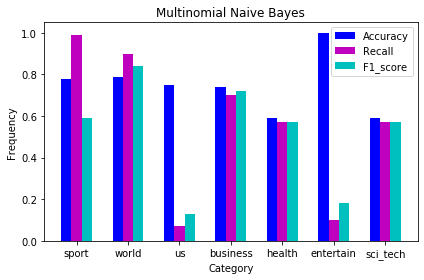

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7
means_accuracy = (0.78,0.79,0.75,0.74,0.59,1.00,0.59)
means_recall = (0.99,0.90,0.07,0.70,0.57,0.10,0.57)
means_f1_score = (0.59,0.84,0.13,0.72,0.57,0.18,0.57)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 1.0

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='b',
label='Accuracy')

rects2 = plt.bar(index + bar_width, means_recall, bar_width,
alpha=opacity,
color='m',
label='Recall')

rects3 = plt.bar(index + bar_width + bar_width, means_f1_score, bar_width,
alpha=opacity,
color='c',
label='F1_score')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Multinomial Naive Bayes')
plt.xticks(index + bar_width, ('sport','world','us', 'business', 'health', 'entertain', 'sci_tech'))
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
#SVM Algorithm
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [21]:
#Let's try to check the Working of Model
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "rojit sharma hit 300 in odi cricket"

docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])






sport


In [15]:
#run on test data
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

world  -  world
world  -  world
business  -  business
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
sci_tech  -  sci_tech
business  -  business
entertainment  -  entertainment
business  -  business
sport  -  sport
world  -  world
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
us  -  us
world  -  world
world  -  world
health  -  health
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
entertainment  -  entertainment
business  -  business
business  -  business
business  -  business
world  -  world
sport  -  sport
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
world  -  world
sport  -  sport
sport  -  sport
us  -  us
sport  -  sport
us  -  us
entertainment  -  entertainment
us  -  us
world  -  world
business  -  business
business  -  business
us  -  us
business  -  business
health  -  health
us  -  us
world  -  world
sport  -  sport
sci_tech  -  sci_tech
business  

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

[[87  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  0  0 66  0  0  0]
 [ 0  0  0  0 23  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0 29]]


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test,predicted))

Accuracy score: 1.0


In [18]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        29

   micro avg       1.00      1.00      1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359

